In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dataset_info(df):
    display(df.describe(),
    pd.DataFrame({
        'feature': df.columns.values,
        'dtypes': [df[col].dtype for col in df.columns],
        'n_unique': df.nunique().values,
        'n_nan': [df[col].isna().sum() for col in df.columns],
        'n_dupe': [df.duplicated().sum() for row in df.columns],
        'sample_unique': [df[col].unique() for col in df.columns]
        })
    )
    print(f'''
          Total Columns that having missing value = {df.isnull().any().sum()}
          Total Columns that are clean            = {df.shape[1] - df.isnull().any().sum()}
          Total Rows that having missing value    = {df.isnull().sum().sum()}
          Total Rows                              = {df.shape[0]}
          Totol Percentage of missing value      = {(df.isnull().sum().sum()/np.prod(df.shape)) * 100}
          ''')

In [3]:
def class_pie(class_counts):
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%',  explode=(0.1, 0.1), startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    
    legend_labels = [f'{index}: {count}' for index, count in zip(class_counts.index, class_counts)]
    plt.legend(legend_labels, title='Quality Counts', loc='upper right')
    plt.tight_layout()
    plt.show()

# Apple quality dataset

In [4]:
df = pd.read_csv("apple_quality/apple_quality.csv")
display(df.head(2), df.sample(10), df.tail(2))

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1948,1948.0,1.562081,1.873431,-1.588409,1.349167,-1.116332,-0.399390,0.420270888,good
3821,3821.0,3.024898,-1.870915,-2.666318,2.286341,-3.604327,0.735995,-0.059952688,bad
2339,2339.0,-3.049346,0.067110,1.741481,0.800206,1.128096,-0.948431,2.747653602,bad
2238,2238.0,-2.224324,-1.239663,-1.320690,1.075998,1.047349,2.869683,1.412873536,bad
2641,2641.0,-0.863402,-0.161537,-0.492358,-0.453748,-2.708934,0.744435,-0.347664165,bad
1262,1262.0,1.903819,-0.458505,-0.352037,-2.088434,4.748125,-0.799092,2.377949333,good
2002,2002.0,5.403276,-4.026721,-3.991688,1.621552,2.086260,3.162070,4.915941101,good
1470,1470.0,3.561434,-1.507359,-1.712780,-0.562656,4.636005,0.459920,3.47299406,good
248,248.0,0.113811,-1.507471,-2.051591,0.423058,1.314812,1.935012,-1.098326042,bad
3366,3366.0,-1.909341,-0.709309,1.275945,0.458010,-4.513731,1.385948,2.236754113,bad


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3999,3999.0,0.27854,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


## Dataset cleaning

In [5]:
df = df[:-1].drop(columns={"A_id"})
df = df.dropna()
df= df.drop_duplicates()
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["Quality"] = 2 * encoder.fit_transform(df["Quality"]) - 1
dataset_info(df)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.002000
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,1.000123
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-1.000000
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.000000
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,1.000000
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.000000
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,Size,float64,4000,0,0,"[-3.970048523, -1.195217191, -0.292023862, -0...."
1,Weight,float64,4000,0,0,"[-2.512336381, -2.839256528, -1.351281995, -2...."
2,Sweetness,float64,4000,0,0,"[5.346329613, 3.664058758, -1.738429162, 1.324..."
3,Crunchiness,float64,4000,0,0,"[-1.012008712, 1.588232309, -0.342615928, -0.0..."
4,Juiciness,float64,4000,0,0,"[1.844900361, 0.853285795, 2.838635512, 3.6379..."
5,Ripeness,float64,4000,0,0,"[0.329839797, 0.867530082, -0.038033328, -3.41..."
6,Acidity,object,4000,0,0,"[-0.491590483, -0.722809367, 2.621636473, 0.79..."
7,Quality,int32,2,0,0,"[1, -1]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 8
          Total Rows that having missing value    = 0
          Total Rows                              = 4000
          Totol Percentage of missing value      = 0.0
          


## Training

### Prepare dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"Quality"})
y = df["Quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (3200, 7), y_train = (3200,)
X_test = (800, 7), y_test = (800,)


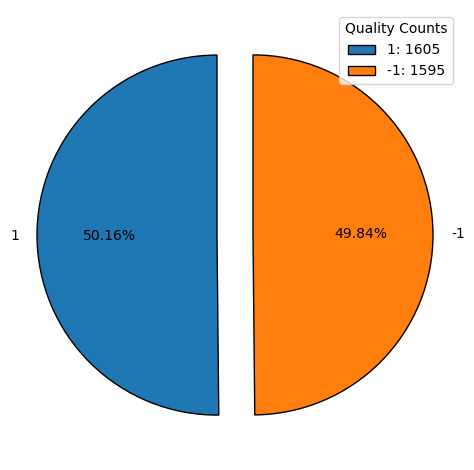

In [10]:
class_pie(y_train.value_counts())

In [11]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_prep = pd.DataFrame(X_train_const)
X_test_prep = pd.DataFrame(X_test_const)

X_train_prep.sample(10)

,0,1,2,3,4,5,6,7
939,1.0,-1.628616,-1.249783,-0.569718,-0.690287,1.985065,2.698404,0.565259
2356,1.0,1.609372,2.201852,-1.900896,1.086437,-0.811725,0.140786,-0.568049
2021,1.0,-0.293244,0.700839,-1.160965,0.520821,0.504984,1.858253,-1.022574
2935,1.0,0.607049,-1.652120,1.663427,0.599210,0.327886,0.752377,0.111186
3140,1.0,0.607075,1.395921,-2.110292,1.307085,0.163561,0.601193,-0.916919
1597,1.0,0.832515,0.021565,0.308693,-2.168154,0.807442,-0.607963,0.515867
901,1.0,-1.017848,0.259212,-0.848021,0.803162,-2.328098,0.083401,-0.170618
572,1.0,0.383277,-1.756569,0.390836,-1.339239,1.667461,-1.275203,0.623490
2245,1.0,1.209945,-2.147818,0.733848,2.270800,0.322011,0.955935,0.184610
780,1.0,0.386975,-0.511268,0.095069,0.553214,-1.166729,0.102343,-0.122073


In [12]:
X_train_prep.to_csv("apple_quality/apple_X_train.csv", index=False)
X_test_prep.to_csv("apple_quality/apple_X_test.csv", index=False)
y_train.to_csv("apple_quality/apple_y_train.csv", index=False)
y_test.to_csv("apple_quality/apple_y_test.csv", index=False)

### Train model

# Cars dataset

In [17]:
df = pd.read_csv("cars/car_data.csv")
display(df.head(2), df.sample(10), df.tail(2))

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0


,User ID,Gender,Age,AnnualSalary,Purchased
56,828,Male,48,21500,1
757,856,Male,38,76500,0


,User ID,Gender,Age,AnnualSalary,Purchased
998,299,Female,48,134000,1
999,687,Female,44,73500,0


## Dataset cleaning

In [18]:
df = df.drop(columns={"User ID"})
df = df.dropna()
df = df.drop_duplicates()
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [20]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df.loc[df["Purchased"] == 0, "Purchased"] = -1
df.sample(10)

,Gender,Age,AnnualSalary,Purchased
589,0,40,61000,-1
45,0,37,75000,-1
968,0,19,83500,-1
474,0,39,146500,1
163,1,36,78500,-1
992,1,24,67500,-1
621,1,49,24500,-1
758,0,37,53000,-1
840,1,60,84500,-1
706,0,28,89500,-1


## Prepare for training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"Purchased"})
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (754, 3), y_train = (754,)
X_test = (189, 3), y_test = (189,)


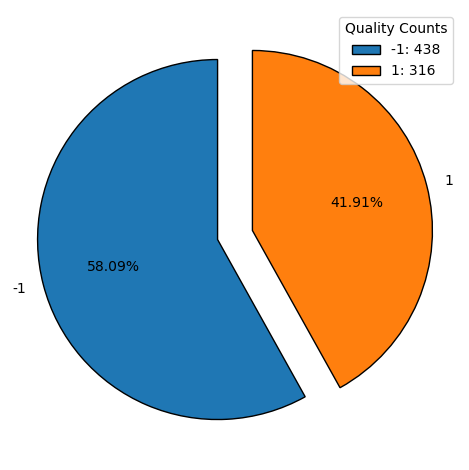

In [22]:
class_pie(y_train.value_counts())

In [23]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_car = pd.DataFrame(X_train_const)
X_test_car = pd.DataFrame(X_test_const)

X_train_car.sample(10)

,0,1,2,3
370,1.0,0.958423,1.000732,1.708989
461,1.0,-1.043380,-0.922977,-0.338782
407,1.0,-1.043380,0.817522,0.420182
727,1.0,-1.043380,-0.373346,-1.312547
752,1.0,-1.043380,-1.289398,-1.212307


In [24]:
X_train_car.to_csv("cars/car_X_train.csv", index=False)
X_test_car.to_csv("cars/car_X_test.csv", index=False)
y_train.to_csv("cars/car_y_train.csv", index=False)
y_test.to_csv("cars/car_y_test.csv", index=False)

## Model training

# HR score

In [2]:
df = pd.read_csv("hr_score/hr_score.csv")
display(df.head(2), df.sample(10), df.tail(2))

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
177,0.066667,0.436749,0.666667,0.7,0.5,0.179487,0.147484,0.240674,0.308472,0
284,0.333333,0.582487,1.000000,0.8,0.8,0.717949,0.693172,0.536290,0.757051,1


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
298,0.333333,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1
299,0.600000,0.754280,0.222222,0.7,0.8,0.820513,0.936553,0.793214,0.718935,1


In [3]:
df = df.drop_duplicates()

In [7]:
dataset_info(df)

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.231778,0.578350,0.681111,0.510667,0.521667,0.457692,0.480880,0.434732,0.426792,0.530000
std,0.238689,0.156784,0.238006,0.229482,0.230523,0.260942,0.244018,0.225863,0.248246,0.499933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.480041,0.527778,0.300000,0.300000,0.230769,0.297052,0.249501,0.224828,0.000000
50%,0.200000,0.576121,0.666667,0.500000,0.500000,0.358974,0.433097,0.401338,0.389711,1.000000
75%,0.400000,0.685611,0.888889,0.700000,0.700000,0.666667,0.687145,0.612519,0.632039,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,years_of_experience,float64,16,0,0,"[0.3333333333333333, 0.1333333333333333, 0.0, ..."
1,functional_competency_score,float64,283,0,0,"[0.7494977777777777, 0.4906377777777777, 0.460..."
2,top1_skills_score,float64,10,0,0,"[0.7777777777777778, 0.4444444444444444, 0.555..."
3,top2_skills_score,float64,10,0,0,"[0.7, 0.3, 0.4, 0.8, 0.6, 0.5, 0.1, 1.0, 0.2, ..."
4,top3_skills_score,float64,11,0,0,"[0.8, 0.4, 0.3, 0.5, 0.6, 0.2, 0.7, 0.9, 1.0, ..."
5,behavior_competency_score,float64,39,0,0,"[0.7692307692307692, 0.1538461538461538, 0.051..."
6,top1_behavior_skill_score,float64,300,0,0,"[0.9316893589492192, 0.3520927425880082, 0.052..."
7,top2_behavior_skill_score,float64,300,0,0,"[0.6620421671026925, 0.1322306051248566, 0.089..."
8,top3_behavior_skill_score,float64,300,0,0,"[0.7524629947278958, 0.3169054776707523, 0.254..."
9,call_for_interview,int64,2,0,0,"[1, 0]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 10
          Total Rows that having missing value    = 0
          Total Rows                              = 300
          Totol Percentage of missing value      = 0.0
          


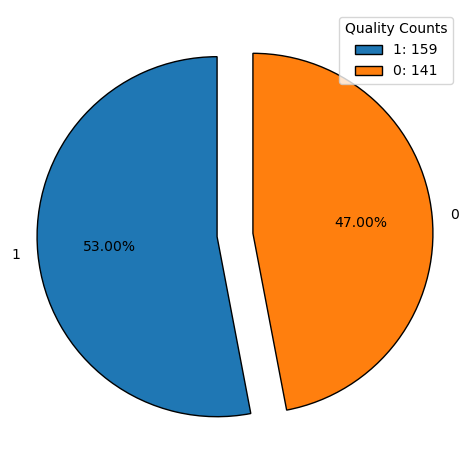

In [10]:
class_pie(df["call_for_interview"].value_counts())

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"call_for_interview"})
y = df["call_for_interview"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (240, 9), y_train = (240,)
X_test = (60, 9), y_test = (60,)


In [5]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_hr = pd.DataFrame(X_train_const)
X_test_hr = pd.DataFrame(X_test_const)

X_train_hr.sample(5)

,0,1,2,3,4,5,6,7,8,9
182,1.0,-1.007310,-0.481140,-0.094134,-0.503459,0.275709,-1.003982,-0.708973,-1.038379,-1.113462
215,1.0,-1.007310,0.149137,-0.094134,-1.363460,-1.005002,-0.614873,0.001038,-0.760019,-0.609573
88,1.0,0.082902,0.886072,0.827991,0.786543,0.275709,0.552454,0.964062,1.062736,0.727742
115,1.0,0.900560,1.452223,1.289053,1.216543,1.556420,1.525226,1.240789,1.320989,1.349331
223,1.0,-0.462204,-0.060180,-0.094134,-1.363460,-0.578099,-0.614873,-0.620032,-0.214083,-0.913095


In [7]:
X_train_hr.to_csv("hr_score/hr_X_train.csv", index=False)
X_test_hr.to_csv("hr_score/hr_X_test.csv", index=False)
y_train.to_csv("hr_score/hr_y_train.csv", index=False)
y_test.to_csv("hr_score/hr_y_test.csv", index=False)

# Loan eligibility

In [4]:
df = pd.read_csv("loan_data/loan_data.csv")
display(df.head(2), df.sample(10), df.tail(2))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
160,LP001560,Male,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
191,LP001656,Male,No,0,Graduate,No,12000,0.0,164.0,360.0,1.0,Semiurban,N
414,LP002335,Female,Yes,0,Not Graduate,No,2149,3237.0,178.0,360.0,0.0,Semiurban,N
573,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
294,LP001947,Male,Yes,0,Graduate,No,2383,3334.0,172.0,360.0,1.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df = df.drop(columns={"Loan_ID"})
df = df.dropna()
df = df.drop_duplicates()
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(0,5):
    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])  
df.iloc[:,10] = le.fit_transform(df.iloc[:,10])
df.iloc[:,-1] = 2 * le.fit_transform(df.iloc[:,-1]) - 1  # target feature

df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
261,1,0,0,0,0,2060,2209.0,134.0,360.0,1.0,1,1
415,0,0,0,0,0,2995,0.0,60.0,360.0,1.0,2,1
391,1,1,3,0,0,9504,0.0,275.0,360.0,1.0,0,1
288,0,0,0,0,0,4124,0.0,115.0,360.0,1.0,1,1
21,1,1,1,0,0,5955,5625.0,315.0,360.0,1.0,2,1
213,1,1,3,1,1,5703,0.0,130.0,360.0,1.0,0,1
358,1,1,0,1,0,3000,1666.0,100.0,480.0,0.0,2,-1
239,1,1,1,0,0,3315,0.0,96.0,360.0,1.0,1,1
564,1,1,2,0,0,8799,0.0,258.0,360.0,0.0,2,-1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,-1


In [8]:
dataset_info(df)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,Gender,object,2,0,0,"[1, 0]"
1,Married,object,2,0,0,"[1, 0]"
2,Dependents,object,4,0,0,"[1, 0, 2, 3]"
3,Education,object,2,0,0,"[0, 1]"
4,Self_Employed,object,2,0,0,"[0, 1]"
5,ApplicantIncome,int64,405,0,0,"[4583, 3000, 2583, 6000, 5417, 2333, 3036, 400..."
6,CoapplicantIncome,float64,232,0,0,"[1508.0, 0.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."
7,LoanAmount,float64,186,0,0,"[128.0, 66.0, 120.0, 141.0, 267.0, 95.0, 158.0..."
8,Loan_Amount_Term,float64,9,0,0,"[360.0, 120.0, 180.0, 60.0, 300.0, 480.0, 240...."
9,Credit_History,float64,2,0,0,"[1.0, 0.0]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 12
          Total Rows that having missing value    = 0
          Total Rows                              = 480
          Totol Percentage of missing value      = 0.0
          


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"Loan_Status"})
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")

X_train.head(10)


X_train = (384, 11), y_train = (384,)
X_test = (96, 11), y_test = 92      1
529     1
505     1
358    -1
512     1
       ..
281     1
299    -1
522     1
33      1
537     1
Name: Loan_Status, Length: 96, dtype: object


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
172,1,1,3,1,0,3522,0.0,81.0,180.0,1.0,0
288,0,0,0,0,0,4124,0.0,115.0,360.0,1.0,1
607,1,1,2,1,0,3987,1411.0,157.0,360.0,1.0,0
55,1,1,2,0,0,2708,1167.0,97.0,360.0,1.0,1
461,1,1,3,0,0,7740,0.0,128.0,180.0,1.0,2
520,1,1,2,1,0,2192,1742.0,45.0,360.0,1.0,1
180,1,1,1,0,0,6400,7250.0,180.0,360.0,0.0,2
585,1,1,1,0,0,4283,3000.0,172.0,84.0,1.0,0
266,1,1,2,0,0,4708,1387.0,150.0,360.0,1.0,1
247,1,1,1,1,0,6608,0.0,137.0,180.0,1.0,2


In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_loan = pd.DataFrame(X_train_const)
X_test_loan = pd.DataFrame(X_test_const)

X_train_loan.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11
295,1.0,0.472155,0.761739,-0.751502,-0.496743,-0.426073,0.084026,0.150984,0.871367,0.280345,0.426073,-1.329180
90,1.0,0.472155,0.761739,2.223515,-0.496743,-0.426073,-0.118391,-0.590022,-0.564206,0.280345,0.426073,-0.046755
321,1.0,0.472155,-1.312785,-0.751502,2.013115,-0.426073,-0.363361,0.223136,-0.227946,-2.397575,-2.347014,1.235670
361,1.0,-2.117950,0.761739,-0.751502,-0.496743,-0.426073,-0.177210,0.294207,-0.434875,0.280345,0.426073,1.235670
292,1.0,-2.117950,0.761739,0.240171,-0.496743,2.347014,2.312091,-0.590022,5.902337,0.280345,0.426073,-0.046755


In [14]:
X_train_loan.to_csv("loan_data/loan_X_train.csv", index=False)
X_test_loan.to_csv("loan_data/loan_X_test.csv", index=False)
y_train.to_csv("loan_data/loan_y_train.csv", index=False)
y_test.to_csv("loan_data/loan_y_test.csv", index=False)